In [1]:
import qutip
import numpy as np
import matplotlib.pyplot as plt 

In [49]:
ground_state = qutip.basis(2,0)
excited_stated = qutip.basis(2,1)

target_Y_halfpi = (-1j * np.pi/4 * qutip.sigmay()).expm()

In [50]:
def infidelity_wrt_target_gate(A, w, Delta, target_gate):
    T = 2 * np.pi / w
    H0 = - .5 * Delta * qutip.sigmaz()
    H1 = - .5 * qutip.sigmax()
    args = {}
    args["A"] = A 
    args["w"] = w
    
    def h1_coefficient(t, args):
        A = args["A"]; w = args["w"]
        return A * np.sin(w*t)

    H = [H0, [H1,h1_coefficient]]
    ts = np.linspace(0, T, 50)
    propagators = qutip.propagator(H = H,
                              t = ts, 
                              c_ops = None,
                              args = args)
    
    Unum = propagators[-1]
    return 1-np.real((2 + (Unum.dag() * target_gate).tr())**2/(6))

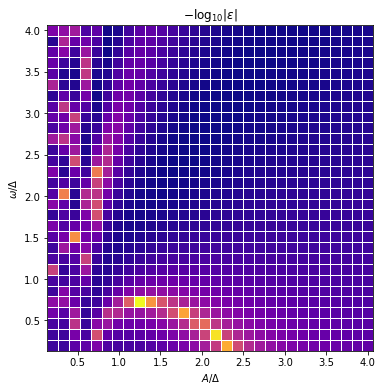

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr

Delta = .5
omega_grid = np.linspace(0.1, 2, 30)
amplitude_grid = np.linspace(0.1, 2, 30)

X,Y = np.meshgrid(amplitude_grid, omega_grid, indexing='ij')
Z = [[-np.log(abs(infidelity_wrt_target_gate(A, w, Deltas, target_Y_halfpi))) for A in amplitude_grid] for w in omega_grid]

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pcolormesh(X/Delta, Y/Delta, Z, edgecolors='w',cmap="plasma")
ax1.set_aspect('equal')
plt.title(r'$-\log_{10} |\varepsilon|$')
plt.xlabel(r'$A/\Delta$')
plt.ylabel(r'$\omega/\Delta$')

plt.show()

In [ ]:
fig = plt.figure(figsize=(22,11)) 
ax1 = fig.add_subplot(121)
ax1.pcolormesh(X, Y, Z, edgecolors='w',cmap="plasma")
ax1.set_aspect('equal')

plt.show()

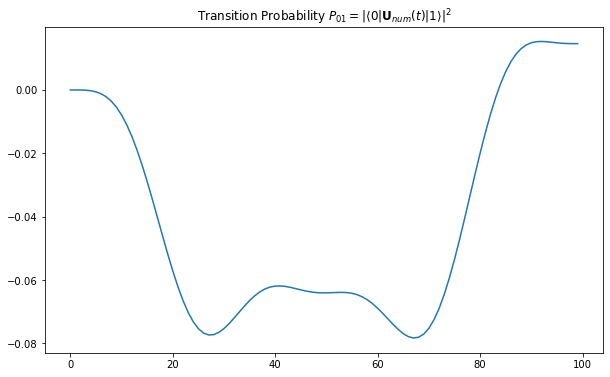

In [48]:
transition_prob = [(excited_stated.dag() * ket).tr()**2 for ket in output.states]

fig1, ax1 = plt.subplots(figsize=(10,6))
plt.title(r'Transition Probability $P_{01} = |\langle 0 |{\bf U}_{{num}}(t)| 1 \rangle|^2$')
plt.plot(transition_prob)

In [ ]:
def infidelity(A,w):
    